In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Data Science\Class work\May\May 12 SLR\11th\SLR - Practicle\House_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

* we are using simple linear regression in this dataset to predict house price.
* Thats why, we will have to choose only two varibale.
    1. dependent variable (price) 
    2. Indendent variable(sqft_living)

In [5]:
df1=df[['price','sqft_living']] # Create another dataframe of 2 variable

In [6]:
df1

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [7]:
df1.shape  # Shape

(21613, 2)

In [8]:
df1.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [9]:
df1.tail()

,price,sqft_living
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600
21612,325000.0,1020


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
price          21613 non-null float64
sqft_living    21613 non-null int64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [11]:
df1.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


### Price

In [12]:
df1['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

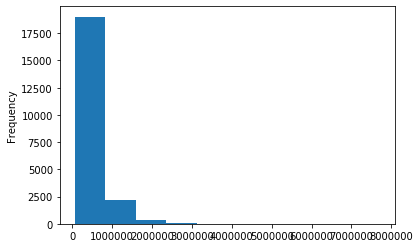

In [13]:
df1['price'].plot(kind='hist',bins=10)

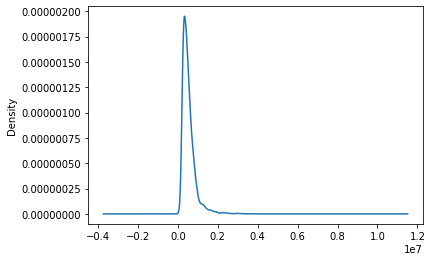

In [14]:
df['price'].plot(kind='kde')

In [15]:
df['price'].skew()  # highly Positively skew

4.024069144684712

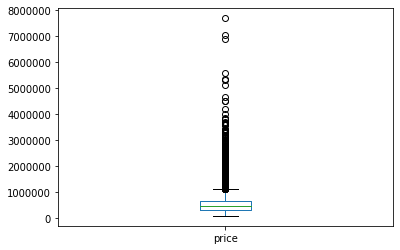

In [16]:
df['price'].plot(kind='box')

In [17]:
df['price'].isnull().sum() # missing values

0

### sqft_living

In [18]:
df1['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

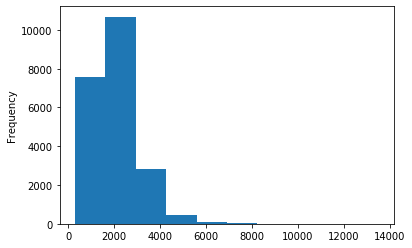

In [19]:
df1['sqft_living'].plot(kind='hist',bins=10)

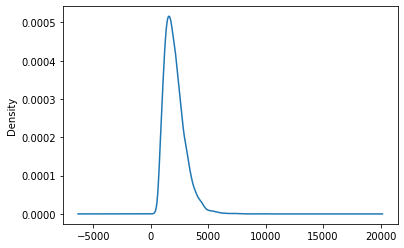

In [20]:
df['sqft_living'].plot(kind='kde')

In [21]:
df['sqft_living'].skew()

1.471555426802092

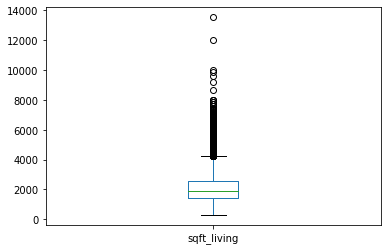

In [22]:
df['sqft_living'].plot(kind='box')

In [23]:
df['sqft_living'].isnull().sum() # missing values

0

## Steps of doing Bivariate Analysis

* **Numerical - Numerical**
    * a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
    * b. Check correlation coefficent to check linear relationship

Text(0, 0.5, 'price')

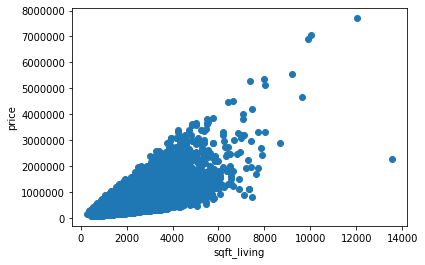

In [24]:
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')

In [49]:
df1

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [63]:
X = df1.iloc[:, 1].values.reshape(-1, 1)
Y = df1.iloc[:,:-1].values.reshape(-1, 1)

In [64]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [65]:
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
X_test

array([[2410],
       [2170],
       [1450],
       ...,
       [2180],
       [1300],
       [3080]], dtype=int64)

In [71]:
Y_test

array([[ 735000.],
       [1150000.],
       [ 350500.],
       ...,
       [ 425000.],
       [ 275000.],
       [ 455000.]])

### PREDICTING THE TEST RESULT

In [72]:
Y_pred = lr.predict(X_test)

In [73]:
Y_pred

array([[634634.94783844],
       [567415.26507094],
       [365756.21676845],
       ...,
       [570216.08518625],
       [323743.91503876],
       [822289.89556437]])

### VISUALISING THE TRAINING SET RESULTS

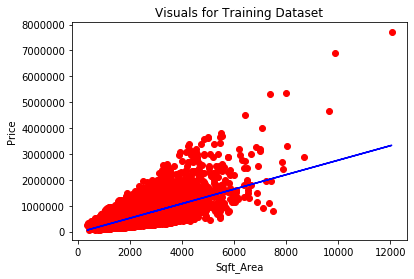

In [74]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Visuals for Training Dataset')
plt.xlabel('Sqft_Area')
plt.ylabel('Price')
plt.show()

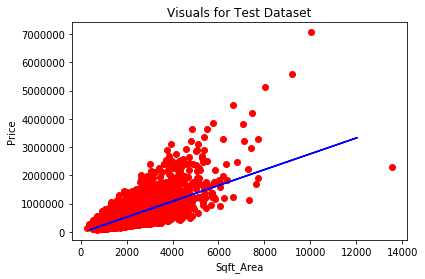

In [75]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Visuals for Test Dataset')
plt.xlabel('Sqft_Area')
plt.ylabel('Price')
plt.show()

In [76]:
m = lr.coef_

In [77]:
m

array([[280.08201153]])

In [78]:
b = lr.intercept_

In [79]:
b

array([-40362.69995185])

In [80]:
0.00175374*2000+1127.3154144055475

1130.8228944055475

In [81]:
bias=lr.score(X_train,Y_train)

In [82]:
bias

0.4911920877578104

In [83]:
variance=lr.score(X_test,Y_test)

In [84]:
variance

0.4959897202673682

In [85]:
df1.head

<bound method NDFrame.head of           price  sqft_living
0      221900.0         1180
1      538000.0         2570
2      180000.0          770
3      604000.0         1960
4      510000.0         1680
...         ...          ...
21608  360000.0         1530
21609  400000.0         2310
21610  402101.0         1020
21611  400000.0         1600
21612  325000.0         1020

[21613 rows x 2 columns]>

In [86]:
# Predict the Price of house for following sqft area:
print("price for 12 Sqft area is :", lr.predict([[1960]]))
print("price for 13 Sqft area is :", lr.predict([[1530]]))
print("price for 14 Sqft area is :", lr.predict([[2000]]))

price for 12 Sqft area is : [[508598.04264938]]
price for 13 Sqft area is : [[388162.77769095]]
price for 14 Sqft area is : [[519801.32311063]]
